# Vertex AI - Object detection using AutoML (using APIs)

### Summary

In this notebook, we'll use Vertex AI to train customer object detection model using image dataset. After training, we will create an endpoint deploy the model to an endpoint and deploy the model to that endpoint. Then we will use the deploymed model for online prediction. 

### Prerequisites

 - Images dataset with object to identify

### Items Covered in this notebook

 - Setup resources
 - Image dataset creation
 - Import images in the dataset and create labels
 - Train custom AutoML models for object tdetection
 - Evaluate the trained model
 - Create and endpoint for deploy model 
 - Perform online prediction on new data
 - Cleanup

#### Setup resources

In [11]:
# Load required packages to run the notebook

import json
import requests
from typing import List, Union
from IPython.display import Image

from google.cloud import bigquery
from google.cloud import aiplatform
from google.cloud.aiplatform.gapic.schema import trainingjob

In [4]:
# Setup variables for notebooks

LOCATION = "us-central1" 
PROJECT_ID = "nishitp-daml"
DATASET_ID = "4715062101670887424"
EXPORT_DIRECTORY = "gs://ds-ml-demos/packages-image-metadata/"
ANNOTATION_SET_ID = "package-classification_iod"
FILTER = f"labels.aiplatform.googleapis.com/annotation_set_name={ANNOTATION_SET_ID}"

In [5]:
# Creating helper functions for API calls

def manage_package_dataset_metadata(method, endpoint, data, auth_token):
    data = str(data)
    headers = {'Content-type': 'application/json', "Authorization": f"Bearer {auth_token}"}
    
    if method == "GET":
        resp = requests.get(endpoint, headers=headers)
    if method == "POST":
        resp = requests.post(endpoint, data=data, headers=headers)
    if method == "DELETE":
        resp = requests.delete(endpoint, headers=headers)
    
    return(resp.json())

##### Let's create image dataset in the Vertex AI and import all images into our dataset

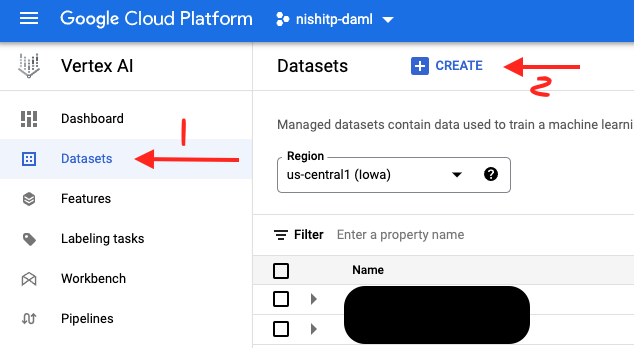

In [14]:
Image(filename = "files/images/gcp-console-vertex-ai-image-dataset.png")